In [14]:
#http://www.scipy-lectures.org/packages/statistics/index.html
#https://pandas.pydata.org/pandas-docs/stable/visualization.html

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn


data1=pd.read_excel('galseb16.xlsx')
#data2=pd.read_excel('DescargaGuaduero.xlsx')
#data3=pd.read_excel('DescargaAlban.xlsx')
#data4=pd.read_excel('ReciboAlban.xlsx')
#data5=pd.read_excel('ReciboGuaduero.xlsx')
data1.head(5)


,Timestamp,GAL_PIT_3401,GAL_PIT_3400A,GAL_DI_3400,GAL_FT_3311B_E2/A,SEB_PIT_3601
0,2022-03-16 18:20:00,1027.0365,202.896759,0.8567,8173,112.062256
1,2022-03-16 18:20:00,1027.0365,202.896759,0.8567,8173,112.062256
2,2022-03-16 18:20:00,1027.0365,202.896759,0.8567,8173,112.062256
3,2022-03-16 18:20:00,1027.0365,202.896759,0.8567,8167,112.062256
4,2022-03-16 18:20:00,1027.0365,202.896759,0.8567,8167,110.505836


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898790 entries, 0 to 898789
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Timestamp          898790 non-null  datetime64[ns]
 1   GAL_PIT_3401       898790 non-null  float64       
 2   GAL_PIT_3400A      898790 non-null  float64       
 3   GAL_DI_3400        898790 non-null  float64       
 4   GAL_FT_3311B_E2/A  898790 non-null  int64         
 5   SEB_PIT_3601       898790 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 41.1 MB


In [16]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
#data1.quantile(0.9995)
doutput=data1.describe(percentiles=[.25, .5, .75, .95, .99, .999])
doutput.to_excel("output.xlsx")
data1.describe(percentiles=[.25, .5, .75, .95, .99, .999])


C:\Users\LEGION\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,GAL_PIT_3401,GAL_PIT_3400A,GAL_DI_3400,GAL_FT_3311B_E2/A,SEB_PIT_3601
count,898790.000000,898790.000000,898790.000000,898790.000000,898790.000000
mean,971.127520,186.078763,0.747876,6961.662587,237.134782
std,282.901124,28.213372,0.045332,1628.439105,89.033639
min,2.984551,0.000000,0.715100,0.000000,1.403830
25%,826.457153,176.035812,0.723500,6850.000000,177.920200
50%,1010.445920,187.798447,0.733100,7362.000000,209.262222
75%,1177.931880,200.790024,0.735800,8114.000000,293.247900
95%,1374.736690,221.014740,0.860600,8146.000000,421.057465
99%,1375.526730,240.168533,0.863800,8169.000000,469.916840
99.9%,1376.229000,285.007019,0.866200,8259.000000,515.022500


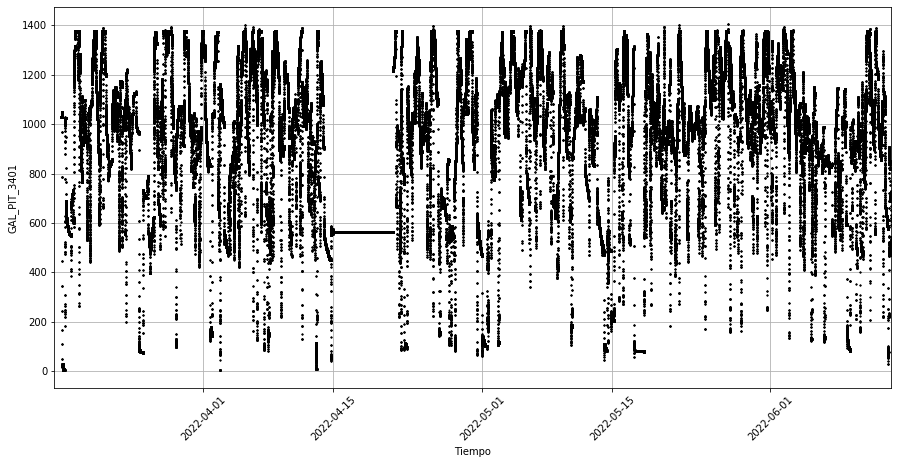

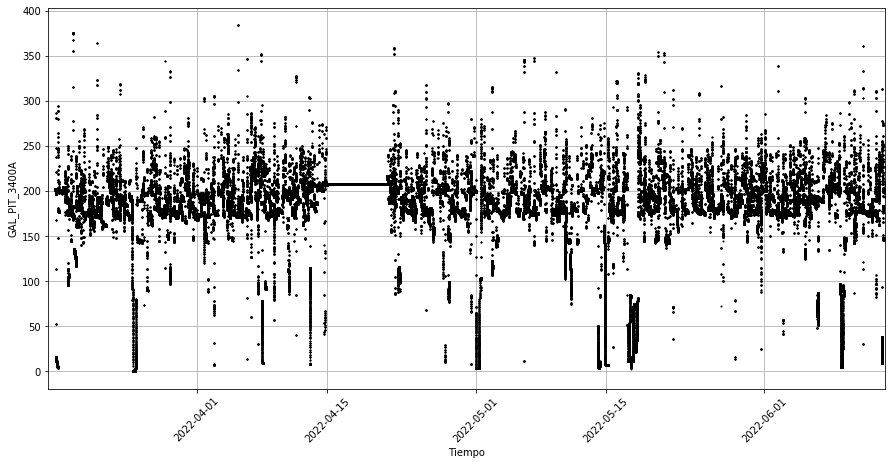

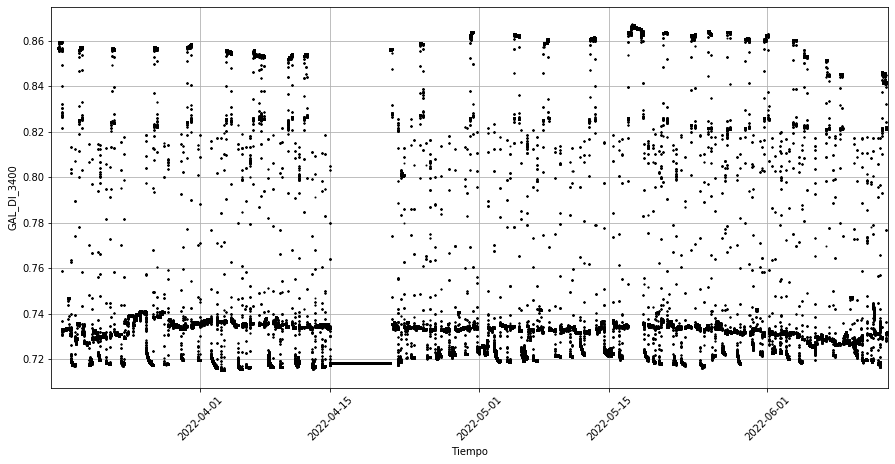

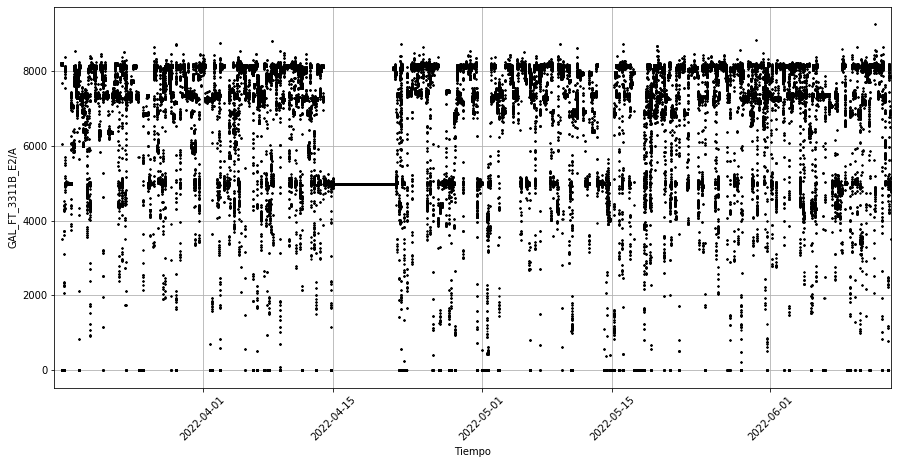

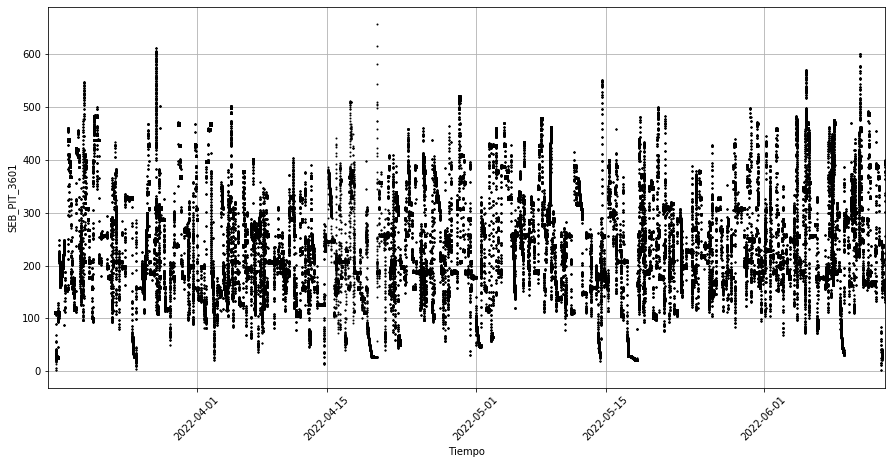

In [17]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

for i in range(data1.shape[1]-1):
    plt.figure(figsize=(15, 7))
    plt.plot(data1.iloc[:,[0]], data1.iloc[:,[i+1]], '.',markersize=2,color="k")
    plt.grid(True)
    plt.xlabel('Tiempo')
    plt.ylabel(headers[i+1])  
    plt.xlim([datetime.date(2022, 3, 16), datetime.date(2022, 6, 14)])
    #plt.title(headers[i+1])
    #plt.setp(ax1.get_xticklabels(), visible=False)
    plt.xticks(rotation=45)
    plt.savefig('{}_A-tiempo.png'.format(i))
    plt.show()
    plt.close()
    
    
#data.plot('time stamp', 'Descarga Medellín L10', 'style = ".")
#plt.figure(figsize=(15, 7))
#plt.plot(data1.iloc[:,[0]], data1.iloc[:,[5]],'.',markersize=1,color="k")
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.xticks(rotation=90)
#plt.axhline(y=110,linewidth=2, color='#2ca02c')
#plt.axhline(y=216,linewidth=2, color='#2ca02c')
#plt.axhline(y=810,linewidth=2, color='#2ca02c')
#plt.savefig('fig1.png', dpi = 300)
    


In [18]:
print(data1.iloc[:,[5]])

        SEB_PIT_3601
0       112.062256  
1       112.062256  
2       112.062256  
3       112.062256  
4       110.505836  
...            ...  
898785  70.923935   
898786  70.923935   
898787  70.923935   
898788  70.923935   
898789  69.916840   

[898790 rows x 1 columns]


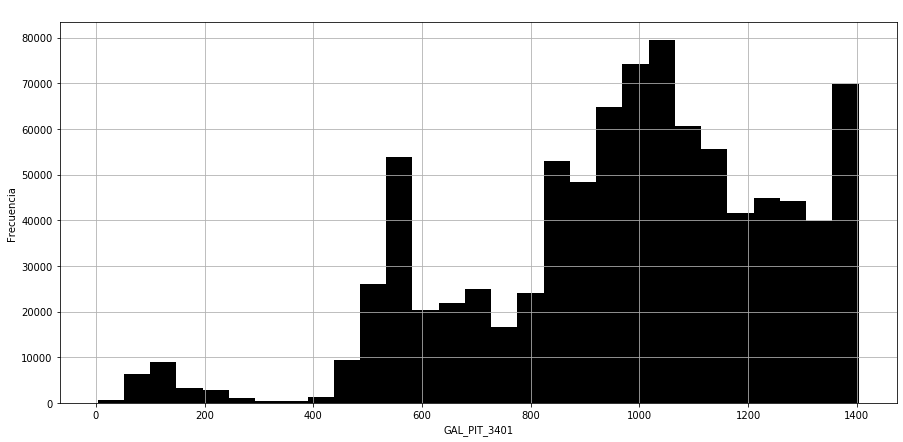

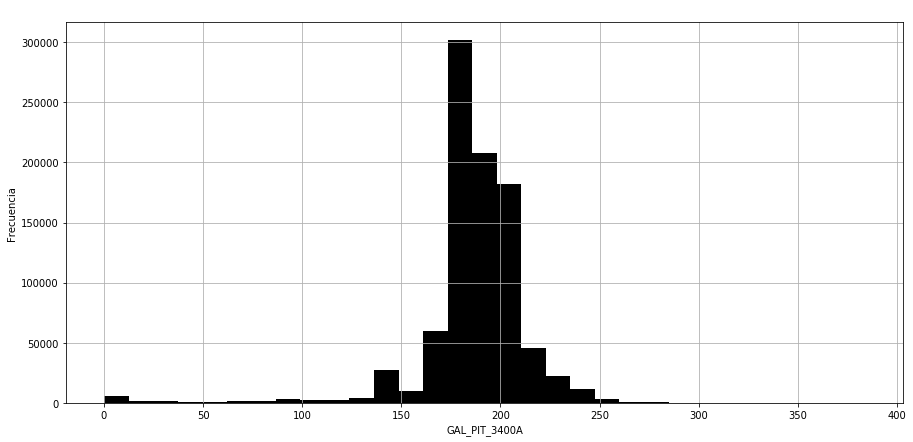

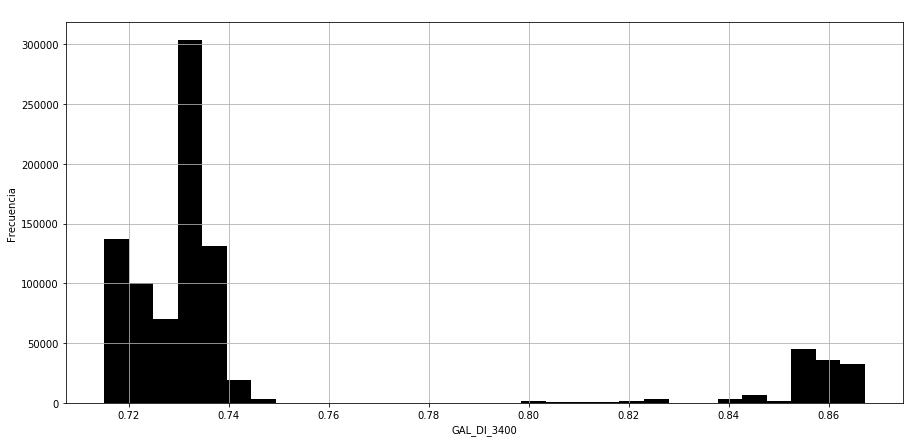

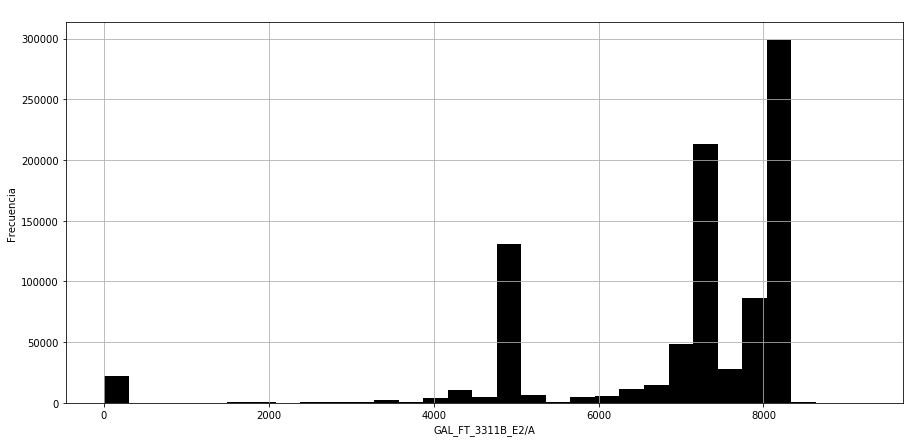

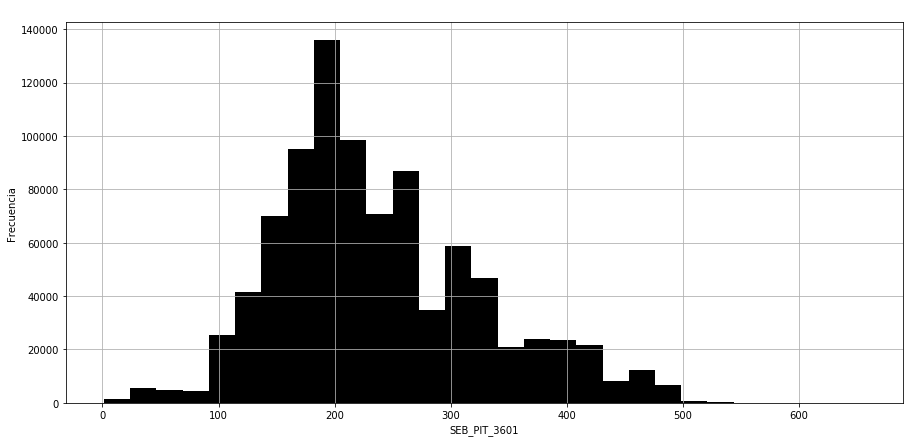

In [19]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
#https://matplotlib.org/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

#plt.title('Histogram of IQ')
#plt.axis([0, 1700, 0, 1])
#plt.grid(True)

for i in range(data1.shape[1]-1):
    #plt.figure(figsize=(15, 7))
    data1.iloc[:,[i+1]].hist(bins='doane', figsize=(15, 7), density=False, cumulative=False,color="k") # bins='auto', bins='fd'. Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
    plt.grid(True)
    plt.title(' ')
    plt.xlabel(headers[i+1])
    plt.ylabel('Frecuencia')  
    #plt.title(headers[i+1])
    #plt.setp(ax1.get_xticklabels(), visible=False)
    #plt.xticks(rotation=45)
    plt.savefig('{}_B-histograma.png'.format(i))
    plt.show()
    plt.close()
    
    #CAMBIOS GUARDADOS 20190102:9:29PM



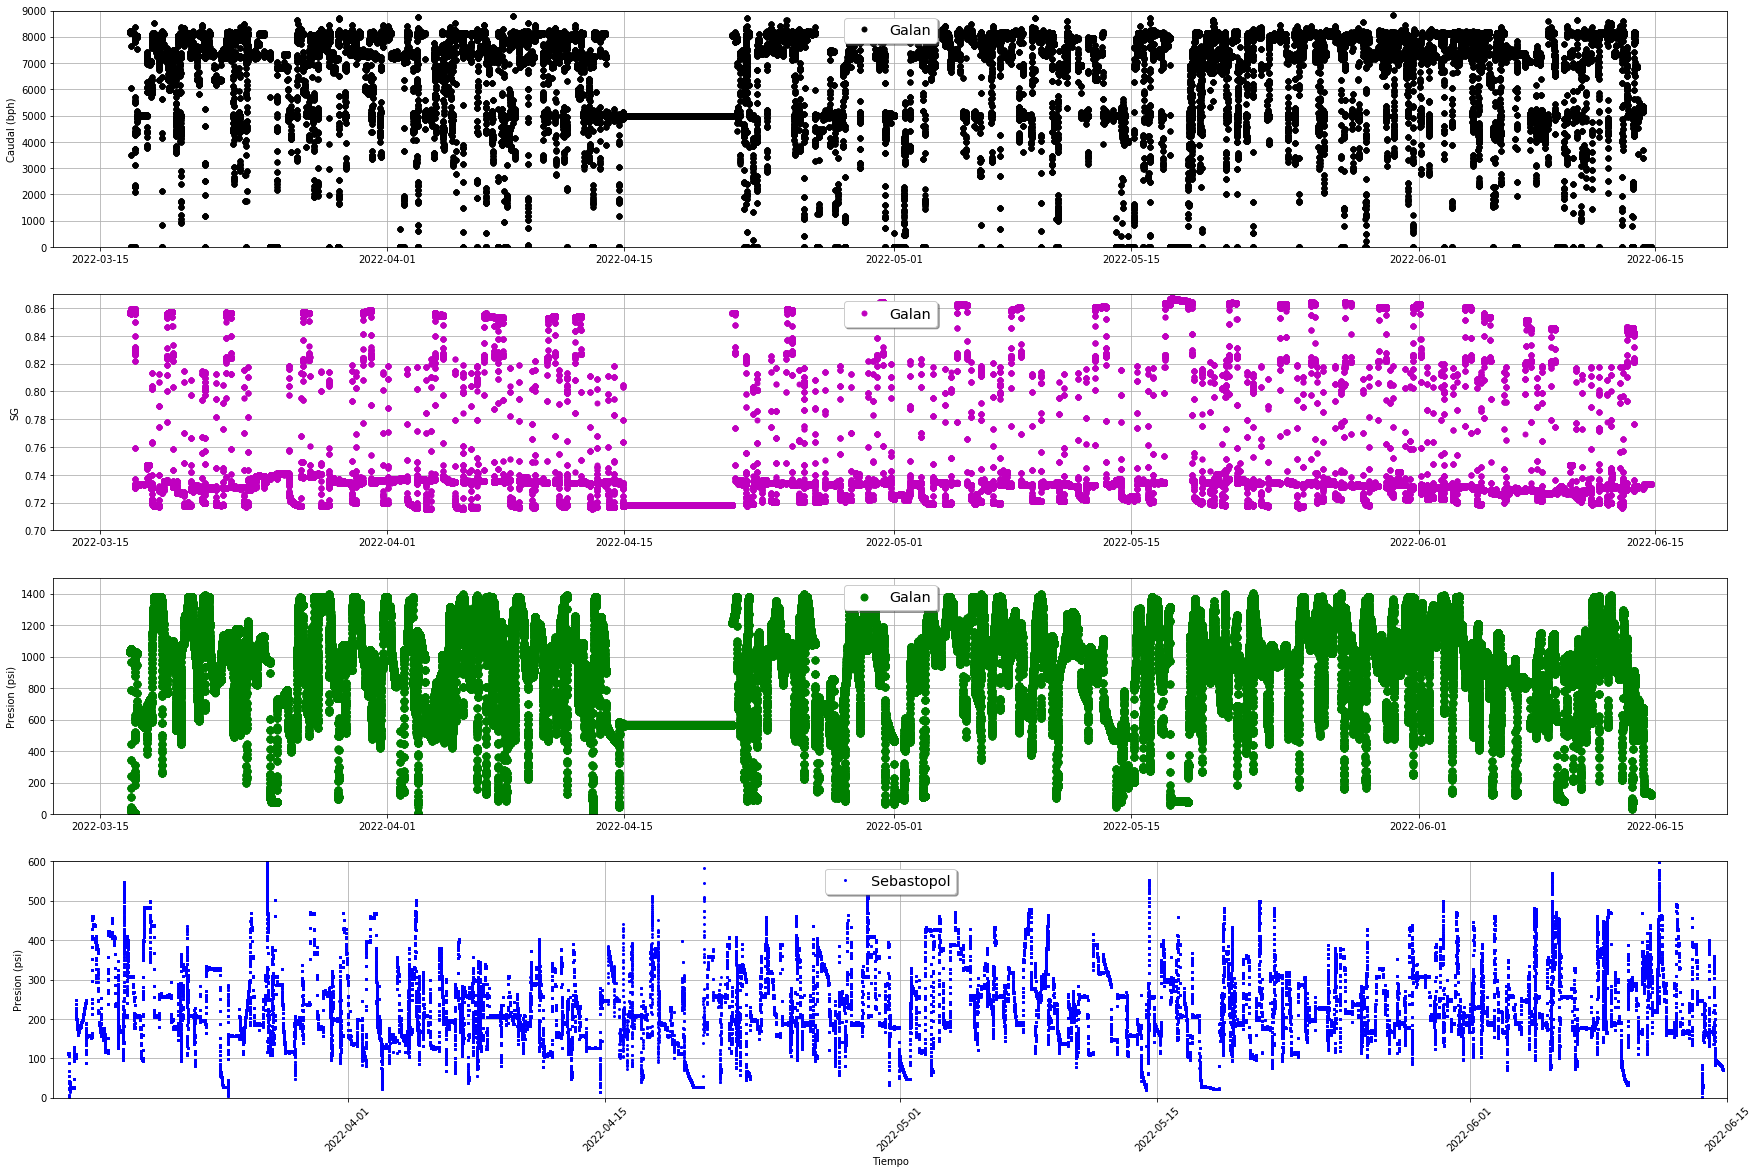

In [22]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(411)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[4]], 'o',markersize=5,color="k")
plt.ylim(0, 9000)
plt.grid(True)
plt.ylabel('Caudal (bph)')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(412, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[3]], 'o',markersize=5,color="m")
plt.ylim(0.7, 0.87)
plt.grid(True)
plt.ylabel('SG')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[1]], 'o',markersize=7,color="g")
plt.ylim(0, 1500)
plt.grid(True)
plt.ylabel('Presion (psi)')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax4 = plt.subplot(414)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[5]], 'o',markersize=2,color="b")
plt.ylim(0, 600)
plt.grid(True)
plt.ylabel('Presion (psi)')
plt.xlabel('Tiempo')
plt.xlim([datetime.date(2022, 3, 16), datetime.date(2022, 6, 15)])
plt.xticks(rotation=45)

plt.legend(['Sebastopol'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('flujos.png')
plt.show()
plt.close()

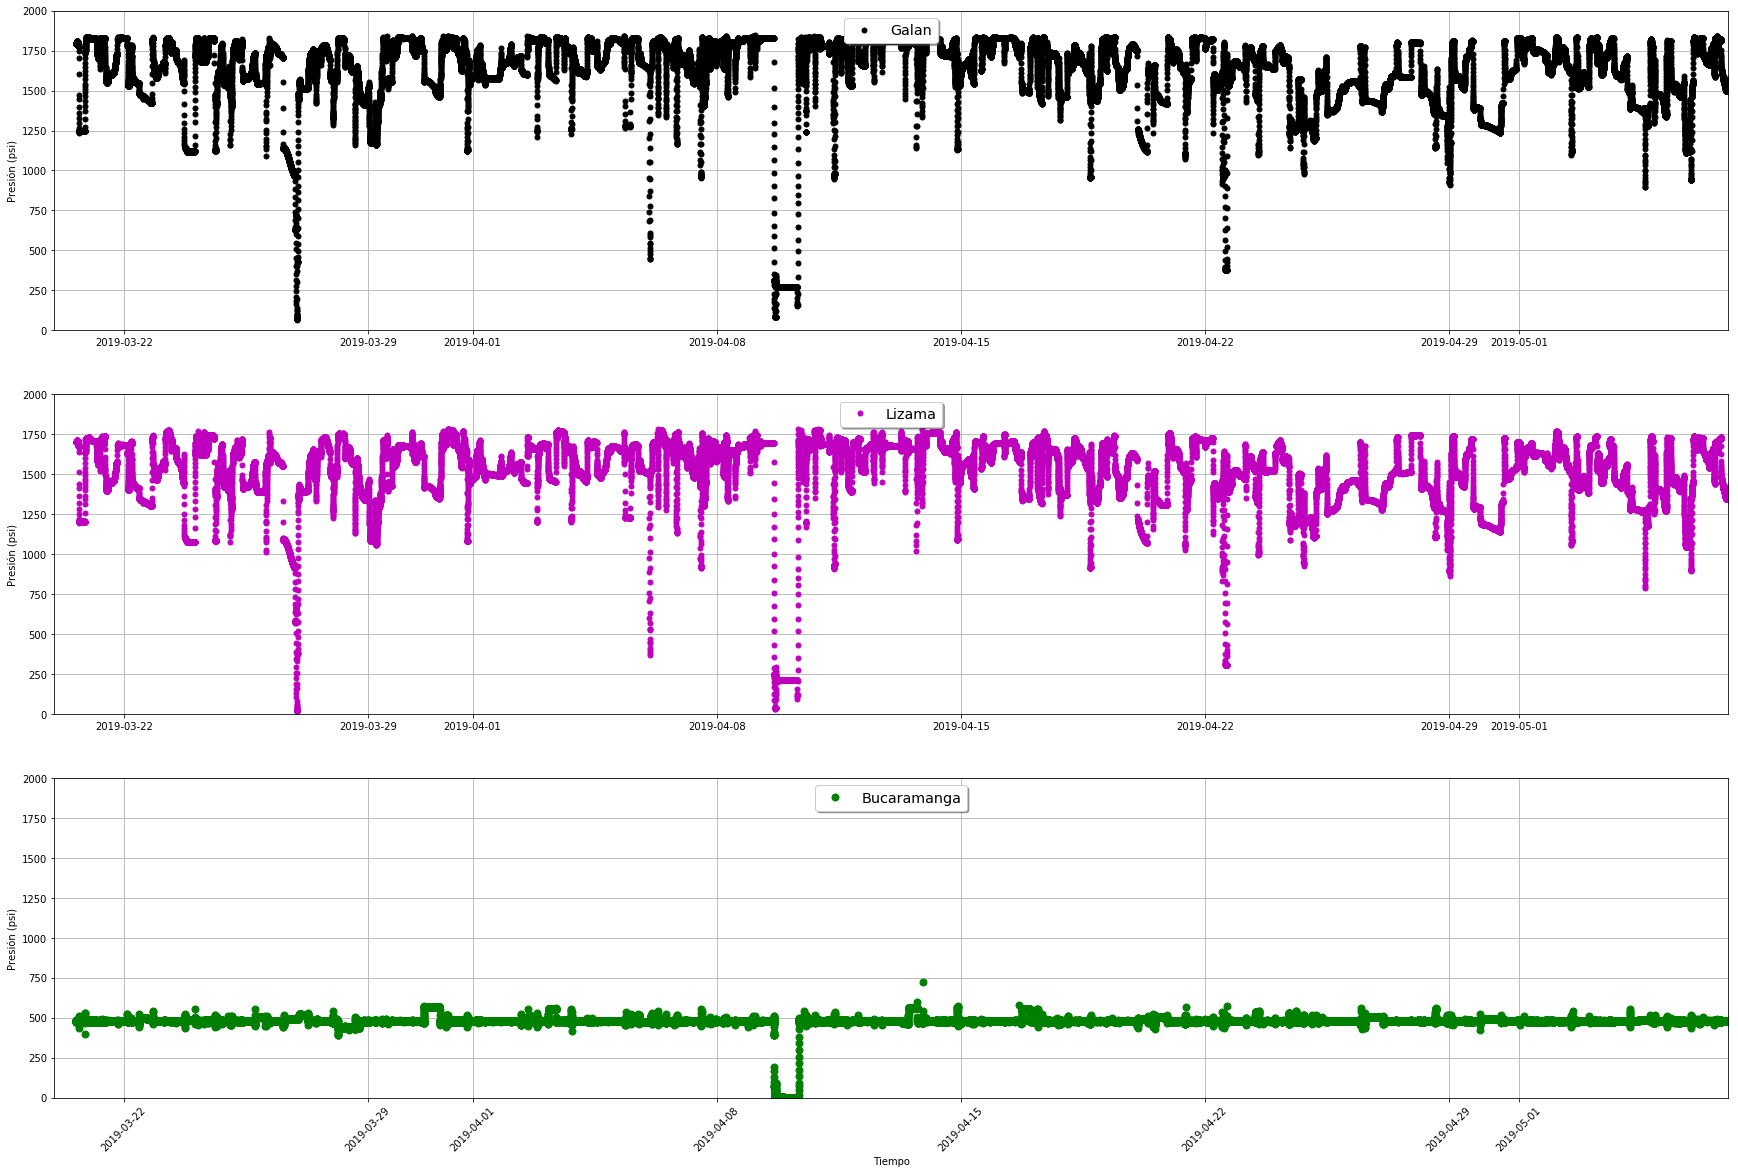

In [72]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[6]], 'o',markersize=5,color="k")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[9]], 'o',markersize=5,color="m")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')
plt.legend(['Lizama'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[14]], 'o',markersize=7,color="g")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Bucaramanga'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('Presion.png')
plt.show()
plt.close()

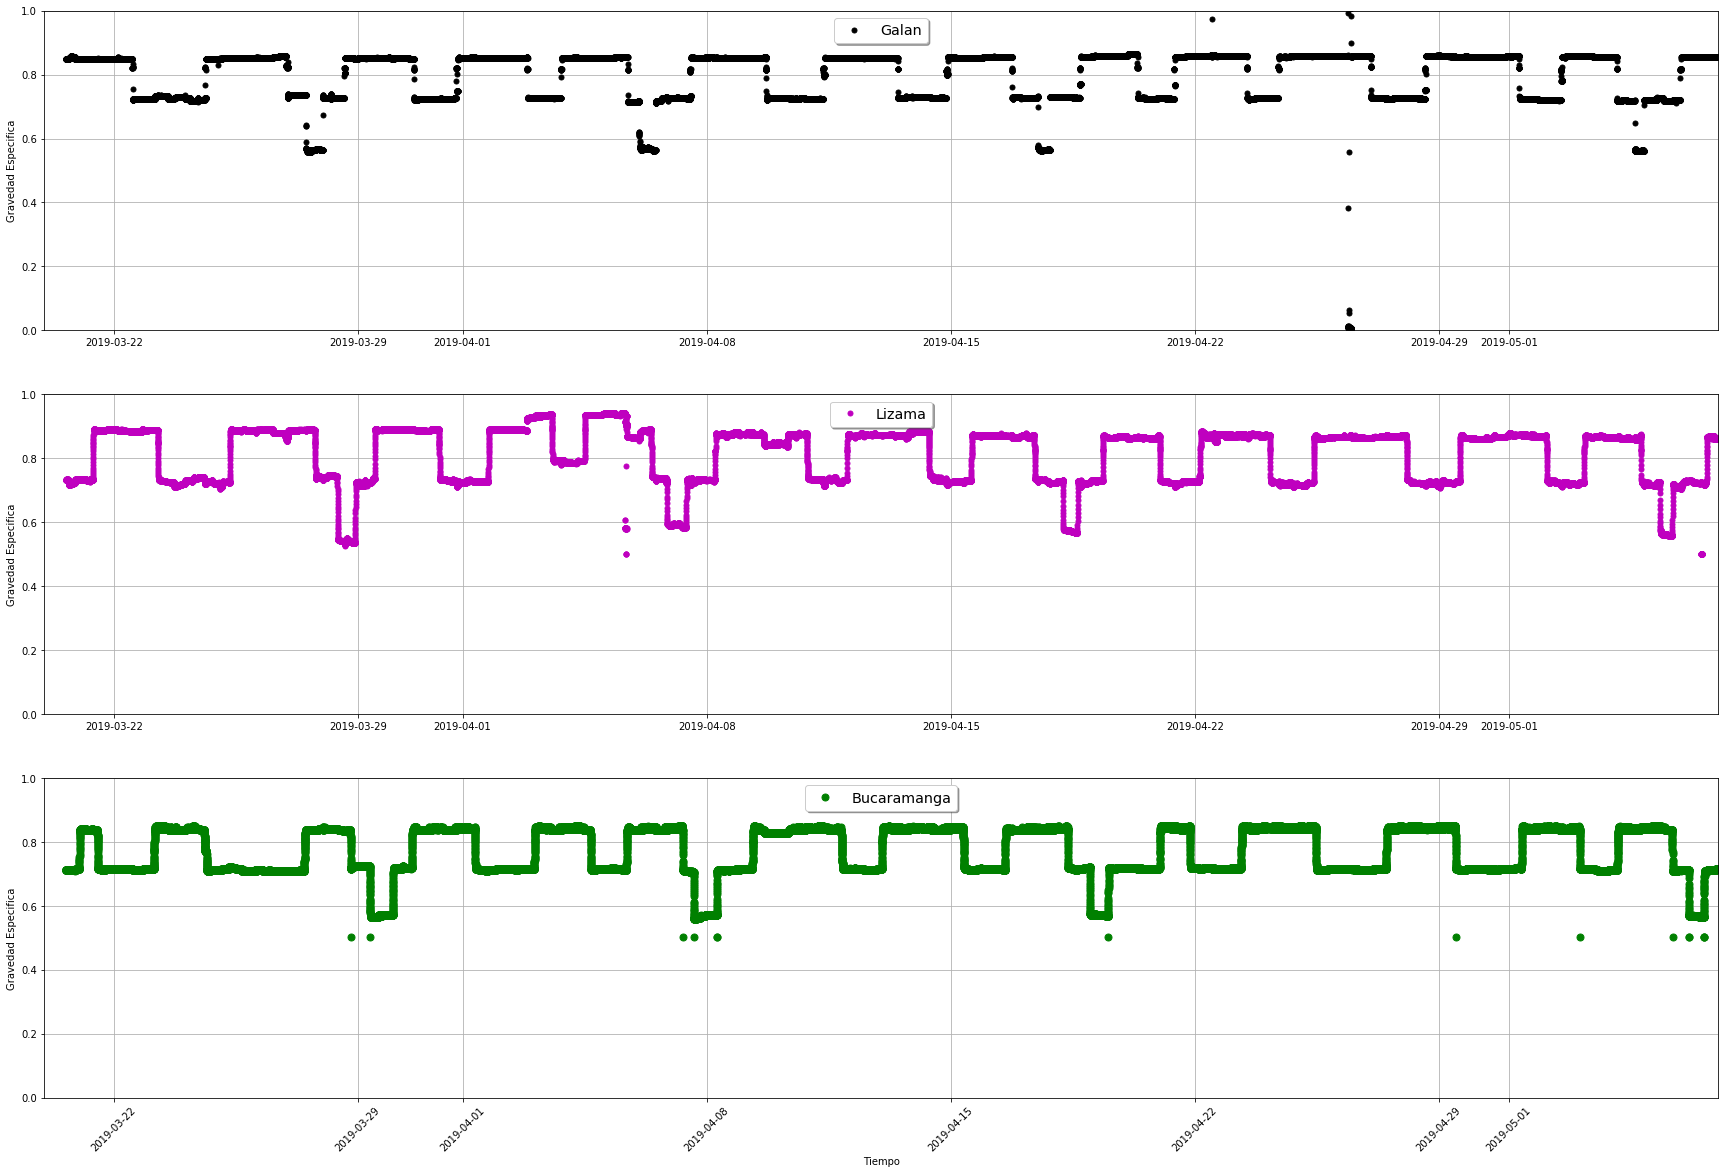

In [73]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[6]], 'o',markersize=5,color="k")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[7]], 'o',markersize=5,color="m")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')
plt.legend(['Lizama'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[12]], 'o',markersize=7,color="g")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Bucaramanga'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('SG.png')
plt.show()
plt.close()

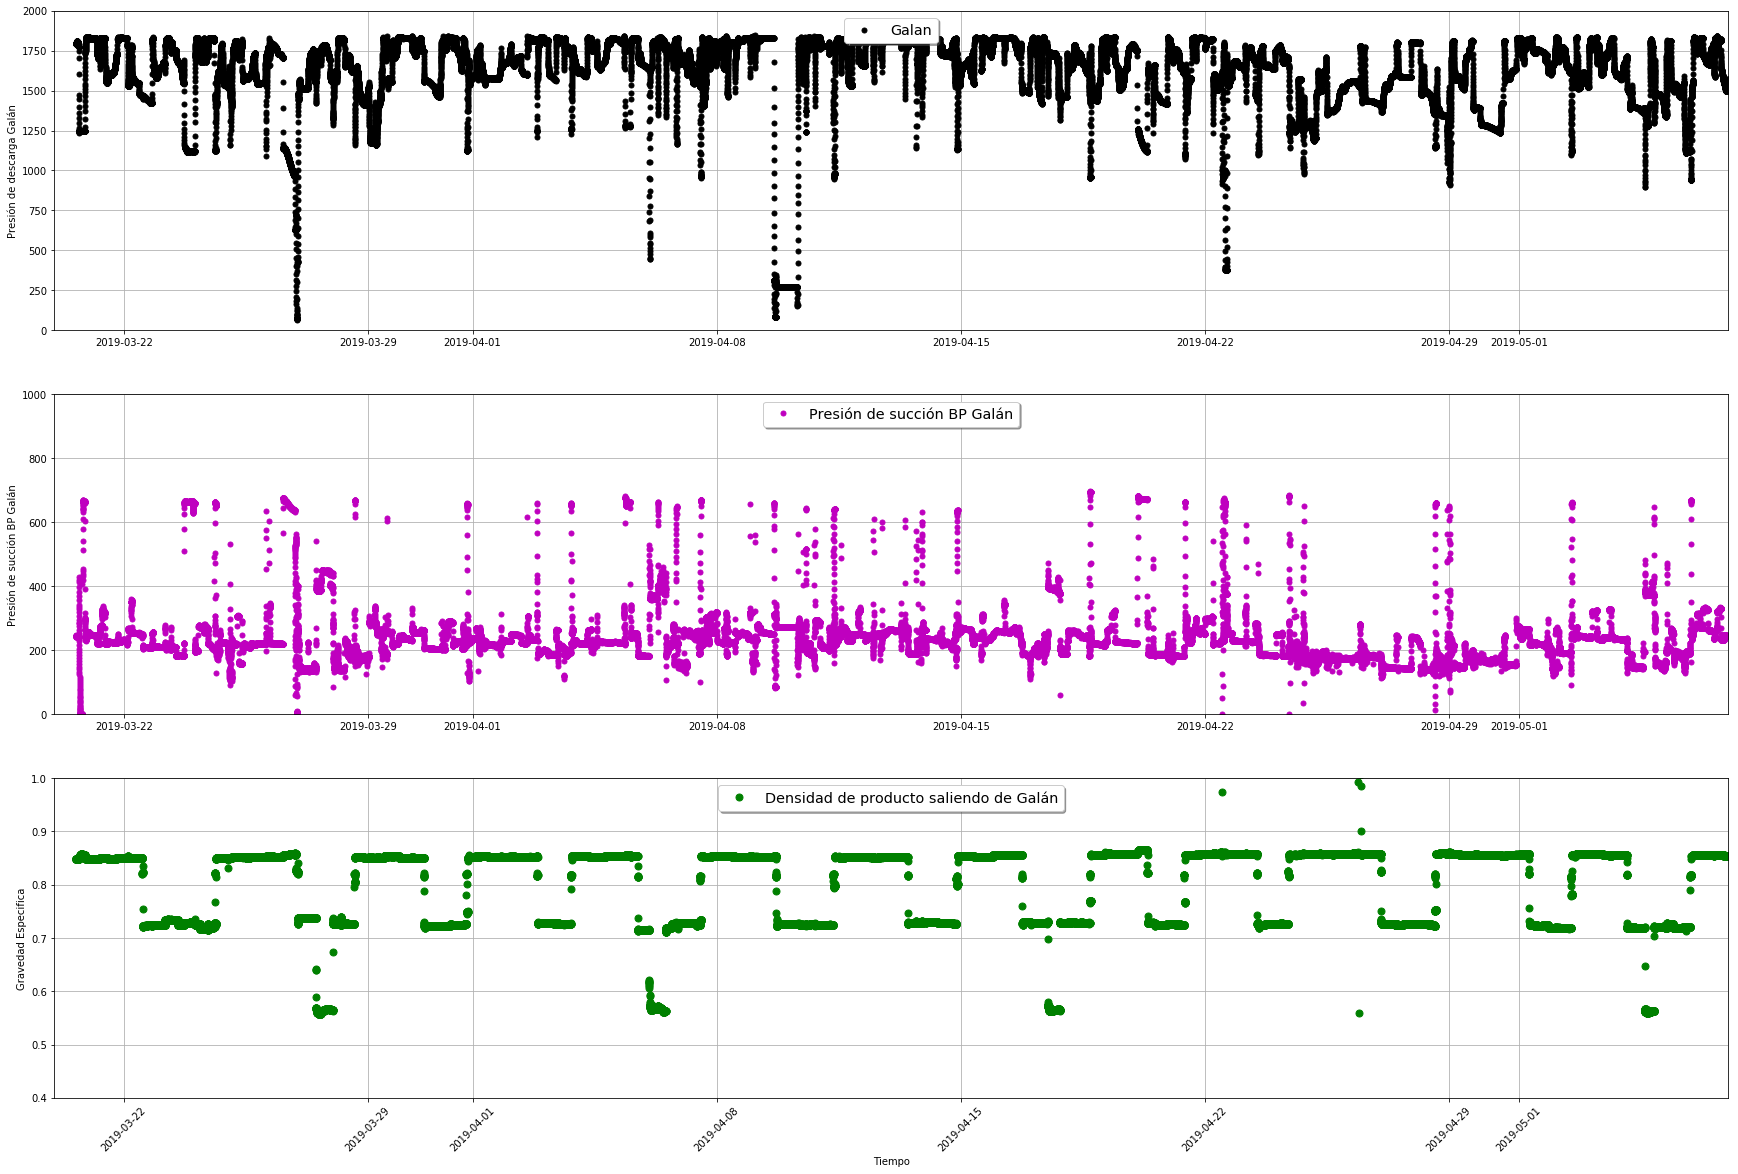

In [8]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[6]], 'o',markersize=5,color="k")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión de descarga Galán')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[5]], 'o',markersize=5,color="m")
plt.ylim(0, 1000)
plt.grid(True)
plt.ylabel('Presión de succión BP Galán')
plt.legend(['Presión de succión BP Galán'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[3]], 'o',markersize=7,color="g")
plt.ylim(0.4, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Densidad de producto saliendo de Galán'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('DescargavssuccionGalan.png')
plt.show()
plt.close()